#  BANK LOAN ANALYSIS PROJECT

### Import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [ ]:
df = pd.read_csv('financial_loan.csv')

In [ ]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### Metadata of data

In [ ]:
print('No.of rows:',df.shape[0])

No.of rows: 38576


In [ ]:
print('No.of columns:',df.shape[1])

No.of columns: 24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [ ]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Total Loan Applications

In [ ]:
total_loan_applications = df['id'].count()
print('Total loan Applications:',total_loan_applications)

Total loan Applications: 38576


### MTD Total Loan Applications

In [ ]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()
print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications(for December 2021):4314


### Total Funded Amount

In [ ]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print('Total Funded Amount: ${:.2f}M' .format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD Total Funded Amount

In [ ]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000
print('MTD Total Funded Amount:${:.2f}M'.format(mtd_total_funded_amount_millions))

MTD Total Funded Amount:$53.98M


### Total Amount Received

In [ ]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received/1000000
print('Total Amount Received: ${:.2f}M' .format(total_amount_received_millions))

Total Amount Received: $473.07M


### MTD Total Amount Received

In [ ]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000
print('MTD Total Amount Received:${:.2f}M'.format(mtd_total_amount_received_millions))

MTD Total Amount Received:$58.07M


### Average Interest Rate

In [ ]:
avg_int_rate = df['int_rate'].mean()*100
print('Avg Int Rate:{:.2f}%'.format(avg_int_rate))

Avg Int Rate:12.05%


### Average Debt-to-Income Ratio

In [ ]:
avg_dti = df['dti'].mean()*100
print('Avg DTI:{:.2f}%'.format(avg_dti))

Avg DTI:13.33%


### Good Loan Metrics

In [ ]:
good_loans = df[df['loan_status'].isin(['Fully Paid','Current'])]
total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_received_millions = good_loan_received/1000000

good_loan_percentage = (good_loan_applications/total_loan_applications)*100

print('Good Loan Applications:',good_loan_applications)
print('Good Loan Funded Amount: ${:.2f}M'.format(good_loan_funded_amount_millions))
print('Good Loan Received: ${:.2f}M'.format(good_loan_received_millions))
print('Good Loan Percentage: {:.2f}%'.format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount: $370.22M
Good Loan Received: $435.79M
Good Loan Percentage: 86.18%


### Bad Loan Metrics

In [ ]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]
total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_received_millions = bad_loan_received/1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications)*100

print('Bad Loan Applications:',bad_loan_applications)
print('Bad Loan Funded Amount: ${:.2f}M'.format(bad_loan_funded_amount_millions))
print('Bad Loan Received: ${:.2f}M'.format(bad_loan_received_millions))
print('Bad Loan Percentage: {:.2f}%'.format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount: $65.53M
Bad Loan Received: $37.28M
Bad Loan Percentage: 13.82%


### Monthly Trends by Issued Date for Total Funded Amount

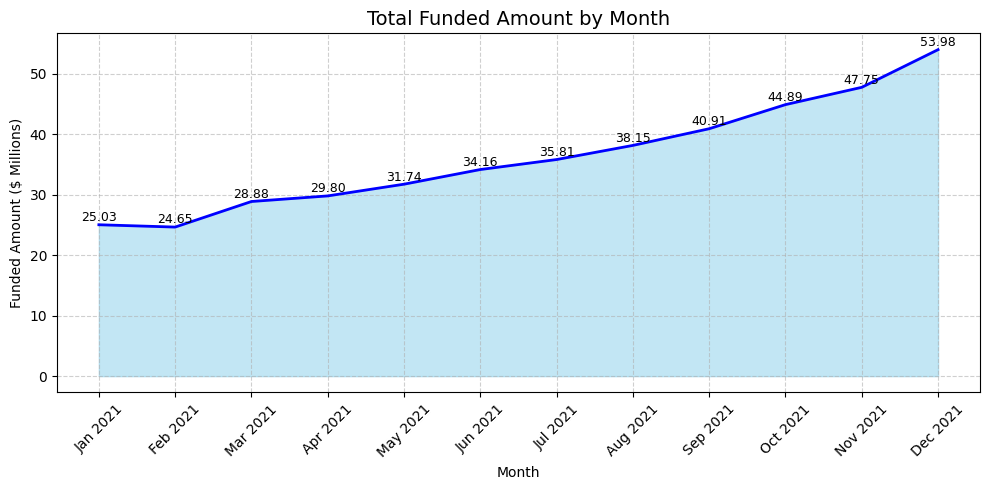

In [ ]:
monthly_funded = (
       df.sort_values('issue_date')
         .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
         .groupby('month_name',sort=False)['loan_amount'].sum()
         .div(1_000_000)
         .reset_index(name = 'loan_amount_millions')
         )

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color = 'skyblue',alpha = 0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth = 2)

for i,row in monthly_funded.iterrows():
  plt.text(i,row['loan_amount_millions'] + 0.1,f"{row['loan_amount_millions']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')


plt.title('Total Funded Amount by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issued Date for Total Amount Received

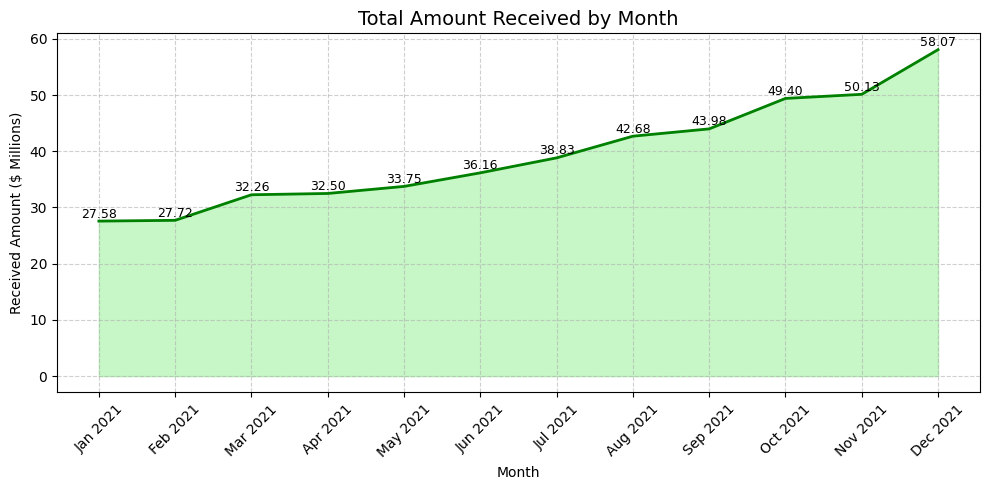

In [ ]:
monthly_received = (
       df.sort_values('issue_date')
         .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
         .groupby('month_name',sort=False)['total_payment'].sum()
         .div(1_000_000)
         .reset_index(name = 'received_amount_millions')
         )

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'],color = 'lightgreen',alpha = 0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green',linewidth = 2)

for i,row in monthly_received.iterrows():
  plt.text(i,row['received_amount_millions'] + 0.1,f"{row['received_amount_millions']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')


plt.title('Total Amount Received by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_received)),labels=monthly_received['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issued Date for Total Loan Applications

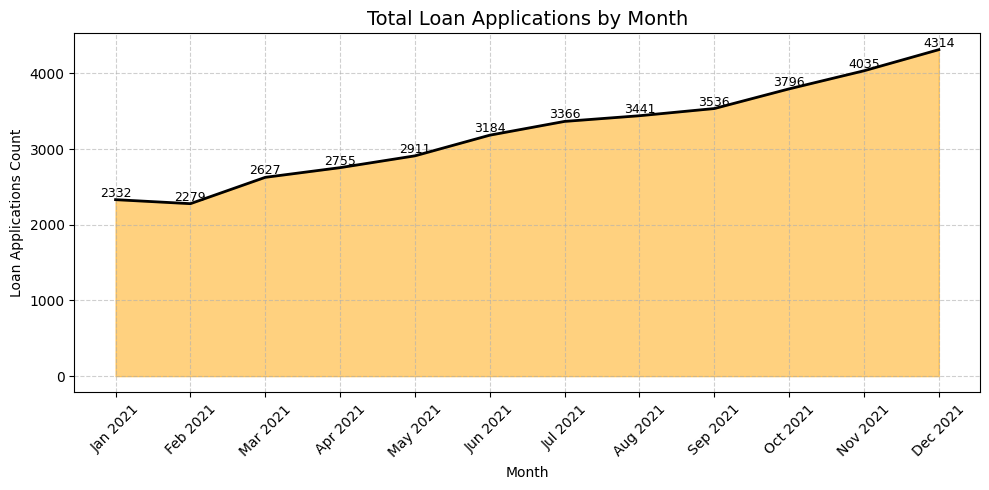

In [ ]:
monthly_applications = (
       df.sort_values('issue_date')
         .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
         .groupby('month_name',sort=False)['id'].count()
         .reset_index(name = 'loan_applications_count')
         )

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'],monthly_applications['loan_applications_count'],color = 'orange',alpha = 0.5)
plt.plot(monthly_applications['month_name'],monthly_applications['loan_applications_count'],color='black',linewidth = 2)

for i,row in monthly_applications.iterrows():
  plt.text(i,row['loan_applications_count'] + 0.1,f"{row['loan_applications_count']:.0f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')


plt.title('Total Loan Applications by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Loan Applications Count')
plt.xticks(ticks=range(len(monthly_applications)),labels=monthly_applications['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by state

Regional Analysis by State for Total Funded Amount

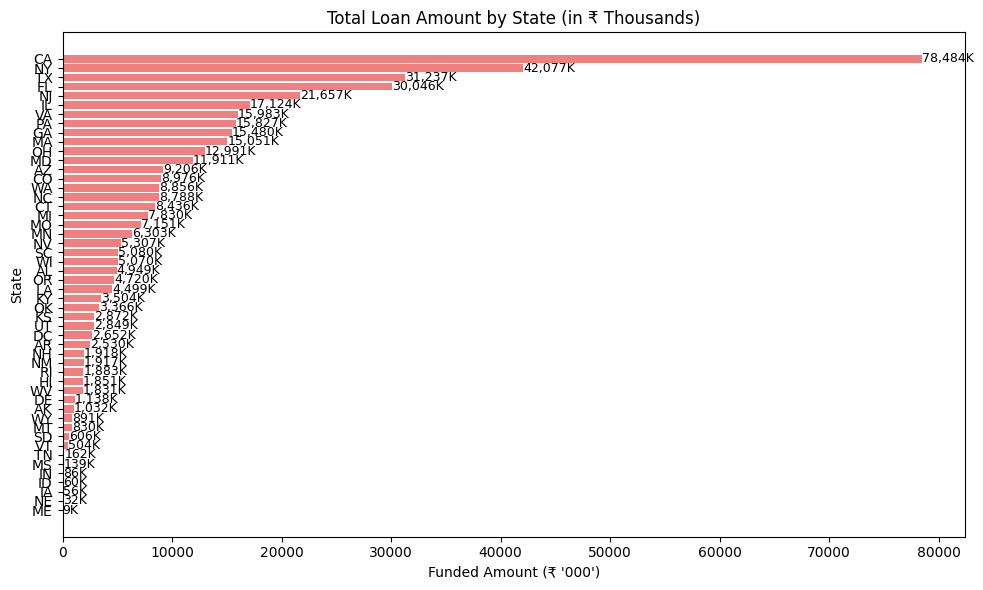

In [ ]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10,6))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values,color='lightcoral')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 10,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K",va='center',fontsize=9)

plt.title('Total Loan Amount by State (in ₹ Thousands)')
plt.xlabel("Funded Amount (₹ '000')")
plt.ylabel('State')
plt.tight_layout()
plt.show()

Regional Analysis by State for Total Amount Received

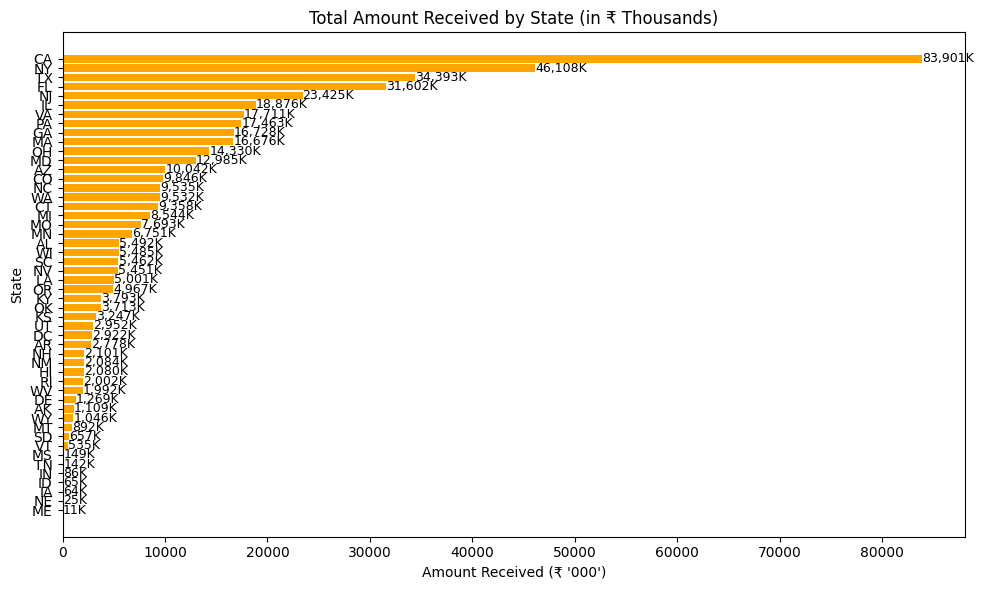

In [ ]:
state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_thousands = state_received / 1000

plt.figure(figsize=(10,6))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values,color='orange')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 10,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K",va='center',fontsize=9)

plt.title('Total Amount Received by State (in ₹ Thousands)')
plt.xlabel("Amount Received (₹ '000')")
plt.ylabel('State')
plt.tight_layout()
plt.show()

Regional Analysis by State for Loan Applications

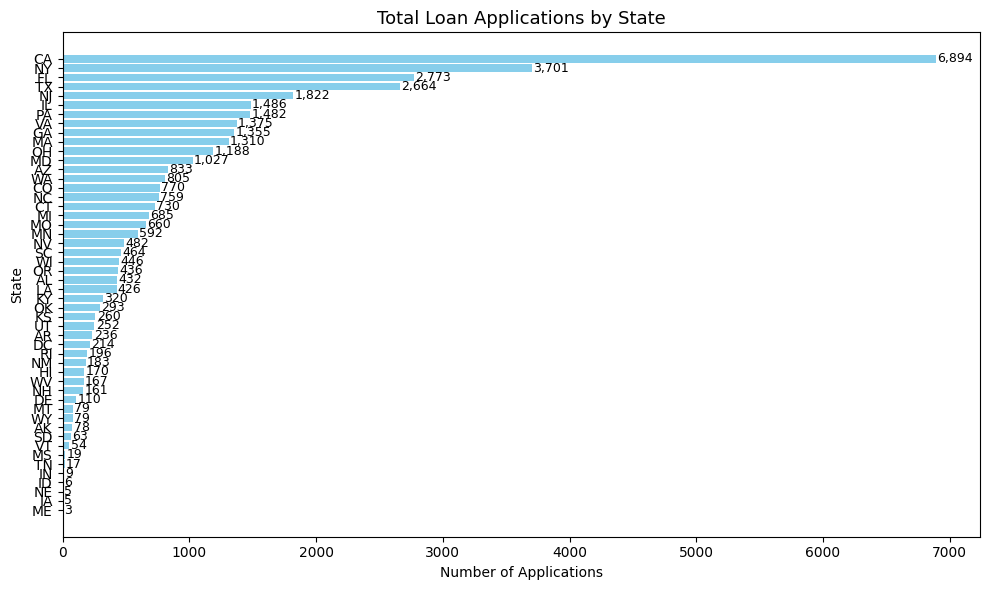

In [ ]:
import matplotlib.pyplot as plt

state_applications = df.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(state_applications.index, state_applications.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f"{width:,}", va='center', fontsize=9)

plt.title('Total Loan Applications by State', fontsize=13)
plt.xlabel('Number of Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Loan Term Analysis

Loan Term Analysis by Total Funded Amount

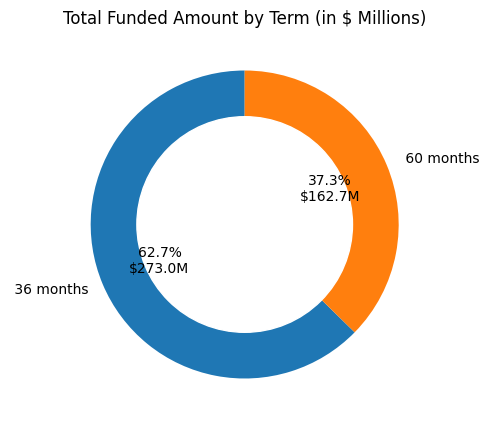

In [ ]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops = {'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.7,color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

Loan Term Analysis by Total Amount Received

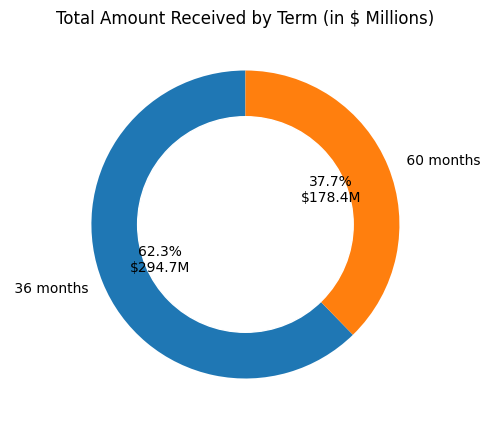

In [ ]:
term_received_millions = df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_received_millions,
    labels=term_received_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_received_millions)/100:.1f}M",
    startangle=90,
    wedgeprops = {'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.7,color='white'))
plt.title("Total Amount Received by Term (in $ Millions)")
plt.show()

Loan Term Analysis by Loan Applications

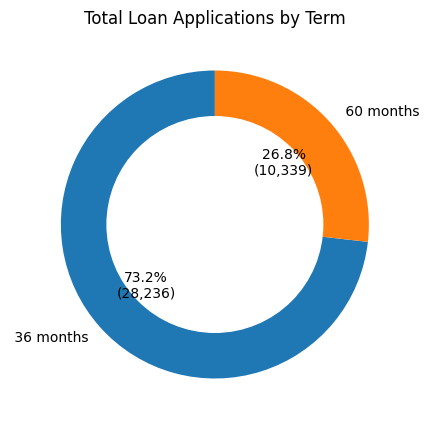

In [ ]:
import matplotlib.pyplot as plt

term_applications = df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(term_applications) / 100):,})',
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.7, color='white'))

plt.title("Total Loan Applications by Term")
plt.show()


### Employee Length

Employee Length by Total Funded Amount

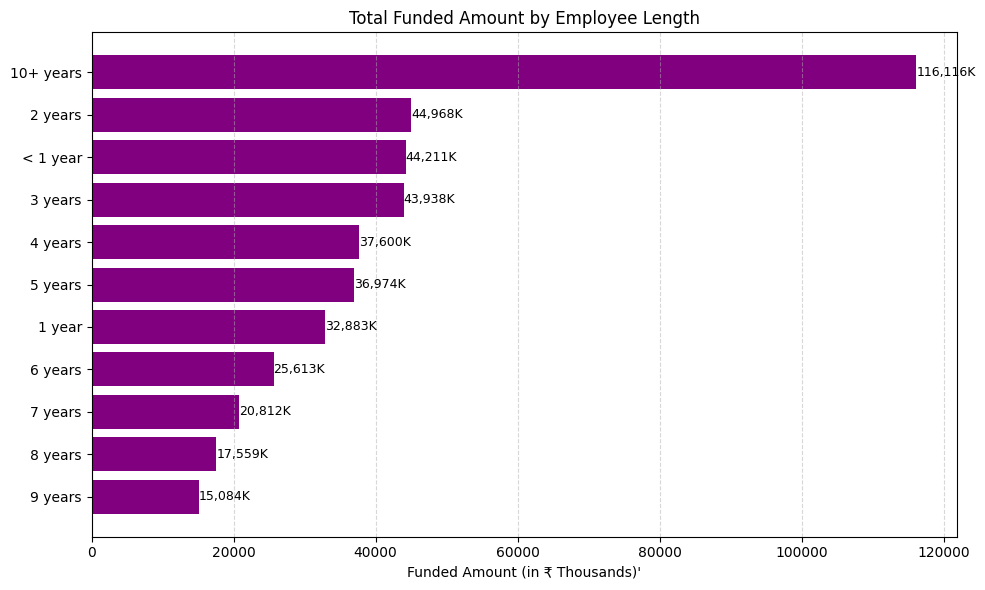

In [ ]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding,color='purple')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K",va='center',fontsize=9)

plt.title('Total Funded Amount by Employee Length')
plt.xlabel("Funded Amount (in ₹ Thousands)'")
plt.grid(axis = 'x',linestyle = '--',alpha = 0.5)
plt.tight_layout()
plt.show()

Employee Length by Total Amount Received

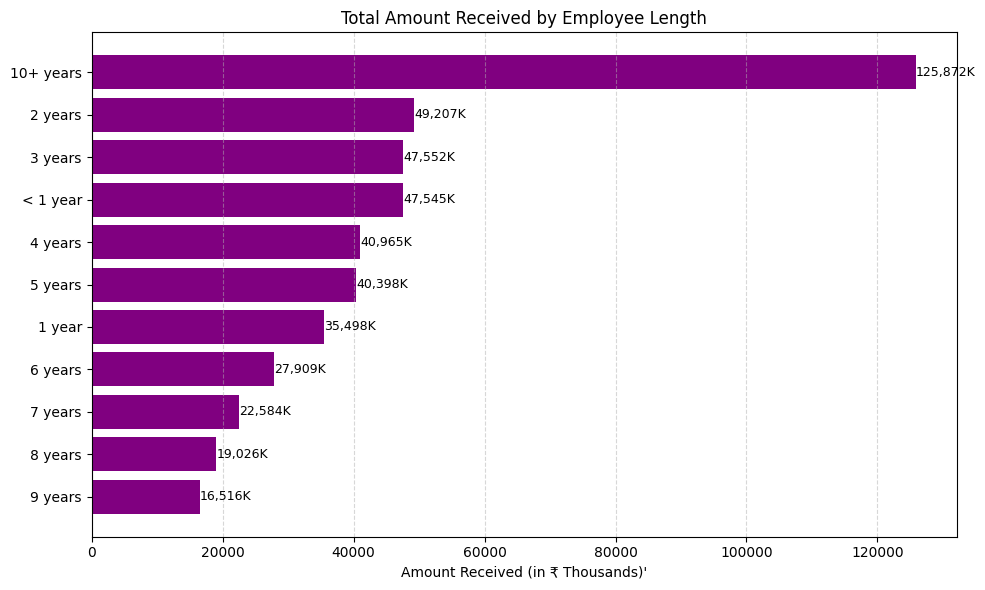

In [ ]:
emp_received = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_received.index, emp_received,color='purple')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K",va='center',fontsize=9)

plt.title('Total Amount Received by Employee Length')
plt.xlabel("Amount Received (in ₹ Thousands)'")
plt.grid(axis = 'x',linestyle = '--',alpha = 0.5)
plt.tight_layout()
plt.show()

Employee Length by Loan Applications

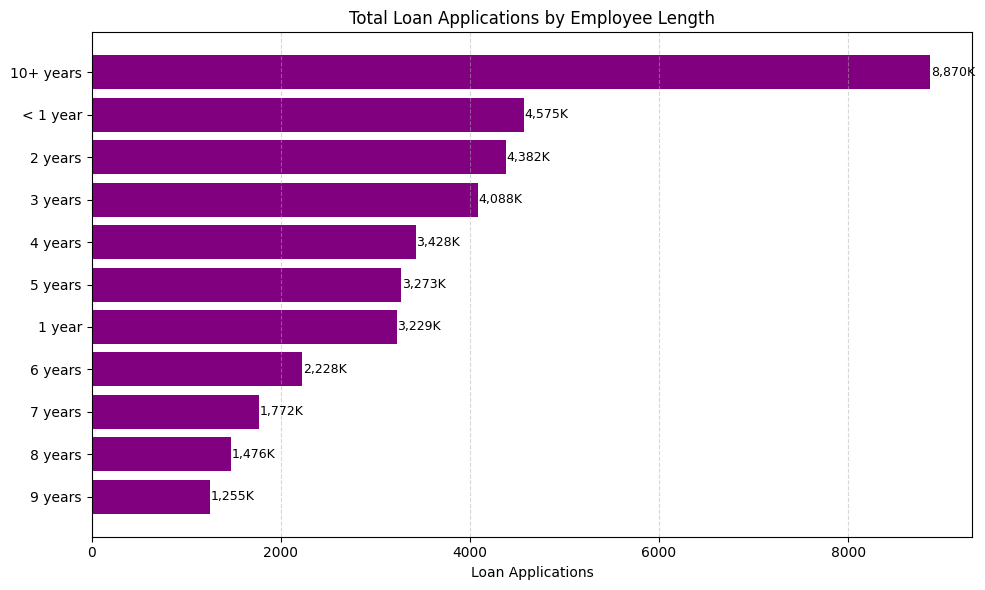

In [ ]:
emp_loan = df.groupby('emp_length')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(emp_loan.index, emp_loan,color='purple')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K",va='center',fontsize=9)

plt.title('Total Loan Applications by Employee Length')
plt.xlabel("Loan Applications")
plt.grid(axis = 'x',linestyle = '--',alpha = 0.5)
plt.tight_layout()
plt.show()

### Loan Purpose

Loan Purpose by Total Funded Amount

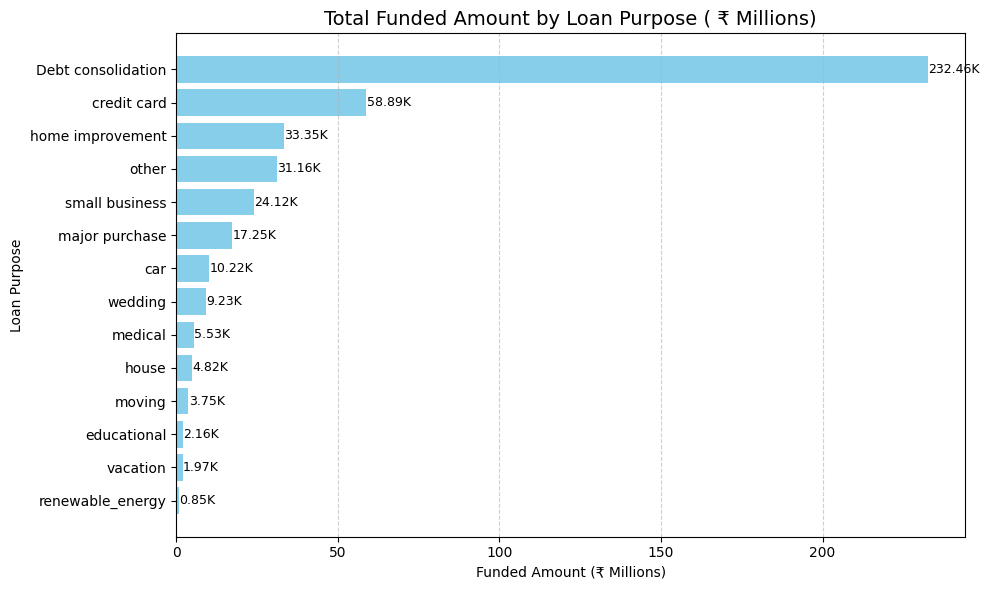

In [ ]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)


plt.figure(figsize=(10,6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values,color='skyblue')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1,bar.get_y() + bar.get_height() / 2, f"{width:,.2f}K",va='center',fontsize=9)

plt.title('Total Funded Amount by Loan Purpose ( ₹ Millions)',fontsize = 14)
plt.xlabel("Funded Amount (₹ Millions)")
plt.ylabel('Loan Purpose')
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

Loan Purpose by Total Amount Received

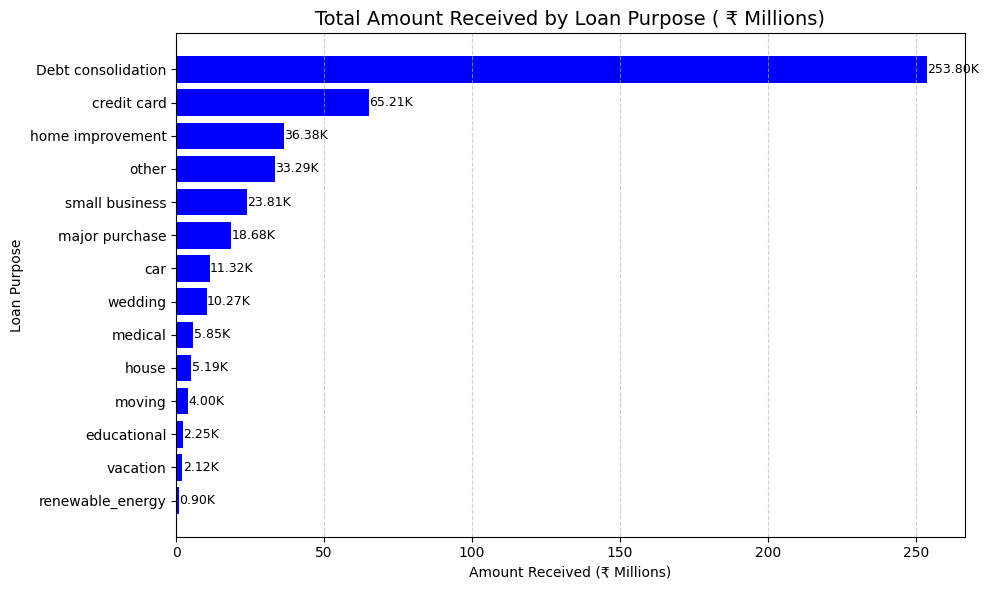

In [ ]:
purpose_received_millions = (df.groupby('purpose')['total_payment'].sum().sort_values()/1000000)


plt.figure(figsize=(10,6))
bars = plt.barh(purpose_received_millions.index, purpose_received_millions.values,color='blue')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1,bar.get_y() + bar.get_height() / 2, f"{width:,.2f}K",va='center',fontsize=9)

plt.title('Total Amount Received by Loan Purpose ( ₹ Millions)',fontsize = 14)
plt.xlabel("Amount Received (₹ Millions)")
plt.ylabel('Loan Purpose')
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

Loan Purpose by Loan Applications

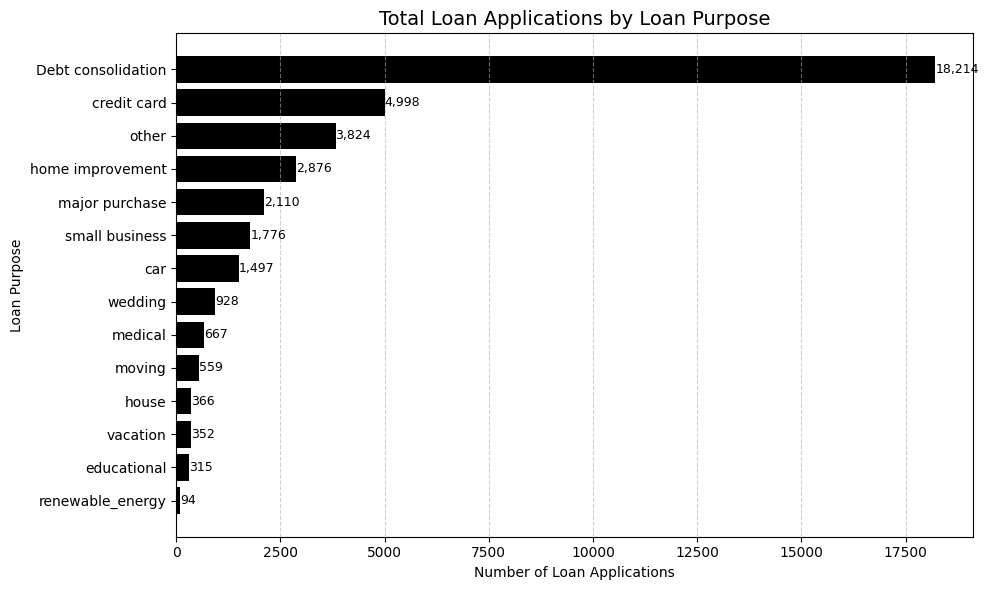

In [ ]:
purpose_applications = df.groupby('purpose')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(purpose_applications.index, purpose_applications.values,color='black')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1,bar.get_y() + bar.get_height() / 2, f"{width:,.0f}",va='center',fontsize=9)

plt.title('Total Loan Applications by Loan Purpose',fontsize = 14)
plt.xlabel("Number of Loan Applications")
plt.ylabel('Loan Purpose')
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

### Home Ownership

Home Ownership by Total Funded Amount

In [ ]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()

Home Ownership by Total Amount Received

In [ ]:
home_amount_received = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_amount_received['total_payment_millions'] = home_amount_received['total_payment'] / 1000000

fig = px.treemap(
    home_amount_received,
    path=['home_ownership'],
    values='total_payment_millions',
    color='total_payment_millions',
    color_continuous_scale='Blues',
    title='Total Amount Received by Home Ownership (₹ Millions)'
)

fig.show()

Home Ownership by Loan Applications

In [ ]:
home_applications = df.groupby('home_ownership')['id'].count().reset_index()

fig = px.treemap(
    home_applications,
    path=['home_ownership'],
    values='id',
    color='id',
    color_continuous_scale='Blues',
    title='Total Loan Applications by Home Ownership'
)

fig.show()